<a href="https://colab.research.google.com/github/guptankit005/Analytics/blob/master/Regression_Prototyping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [252]:
#importing dataset
from sklearn.datasets import fetch_california_housing

In [253]:
#loading dataset 
california_housing = fetch_california_housing()
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [254]:
#converting data into pandas dataframe
california_housing_data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_housing_data['target'] = pd.Series(california_housing.target)

In [255]:
def regression_prototyping(X,y):

  #splitting the dataset
  from sklearn.model_selection import train_test_split
  X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size = 0.3, random_state = 100)
  
  #standardizing the data
  from sklearn.preprocessing import StandardScaler
  X_train = StandardScaler().fit_transform(X_training)
  X_test = StandardScaler().fit_transform(X_testing)
  y_train = (y_training-y_training.mean()) / y_training.std()
  y_test = (y_testing-y_testing.mean()) / y_testing.std()

  #importing all the refression libraries
  from sklearn.linear_model import LinearRegression
  from sklearn.linear_model import Ridge
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import ElasticNet
  from sklearn.linear_model import BayesianRidge
  from sklearn.tree import DecisionTreeRegressor
  from sklearn.svm import SVR
  from sklearn.neighbors import KNeighborsRegressor
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.ensemble import AdaBoostRegressor
  from sklearn.ensemble import GradientBoostingRegressor
  from xgboost import XGBRegressor

  #importing evaluation metrics
  from sklearn.metrics import mean_absolute_error
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import mean_squared_log_error
  from sklearn.metrics import r2_score

  #importing libraries for visualization
  import seaborn as sns
  import matplotlib.pyplot as plt

  #list of regressors
  regressor_names = [
  "Linear Regression",
  "Ridge Regression",
  "Lasso Regression",
  "ElasticNet Regression",
  "Bayesian Ridge Regression",
  "Decision Tree",
  "SVR (Support Vector Regressor)",
  "K Neighbors Regression",
  "Random Forest Regression",
  "AdaBoost Regression",
  "Gradient Boosting",
  "XG Boost Regression"
  ]

  #listing models with some hyperparameters
  regressors = [
  LinearRegression(),
  Ridge(alpha=1.0), 
  Lasso(alpha=0.1),
  ElasticNet(random_state=0),
  BayesianRidge(),
  DecisionTreeRegressor(random_state=0),
  SVR(C=1.0, epsilon=0.2),
  KNeighborsRegressor(n_neighbors=3),
  RandomForestRegressor(max_depth=2, random_state=0),
  AdaBoostRegressor(random_state=0, n_estimators=100),
  GradientBoostingRegressor(random_state=0),
  XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
  ]

  #creating a for loop for all models
  for i in range(0,len(regressors)): 
    model = regressors[i].fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    #evaluation metrics for training data
    print('Training Data Evaluation Metrics for : ', regressor_names[i])
    print("MEA (Mean Absolute Error) :", mean_absolute_error(y_train, y_pred_train))
    print("MSE (Mean Squared Error) :", mean_squared_error(y_train, y_pred_train))
    print("RMSE (Root Mean Squared Error) :", mean_squared_error(y_train, y_pred_train, squared = False))
    print("R2 (R-square Score) :", r2_score(y_train, y_pred_train))
    print("")

    #evaluation metrics for test data
    print('Test Data Evaluation Metrics for : ', regressor_names[i])
    print("MEA (Mean Absolute Error) :", mean_absolute_error(y_test, y_pred_test))
    print("MSE (Mean Squared Error) :", mean_squared_error(y_test, y_pred_test))
    print("RMSE (Root Mean Squared Error) :", mean_squared_error(y_test, y_pred_test, squared = False))
    print("R2 (R-square Score) :", r2_score(y_test, y_pred_test))
    print("")

    #plotting best fit line
    plt.figure(figsize = (8,5))
    plt.scatter(y_test,y_pred_test, c='lightblue')
    p1 = max(max(y_pred_test), max(y_test))
    p2 = min(min(y_pred_test), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'k-')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()
    print("---------------------------------------------------------------")
    print("")

In [256]:
#creating X and y
X_feature = list(california_housing_data.columns)
X_feature.remove('target')
X = california_housing_data[X_feature]

y = california_housing_data['target']

Training Data Evaluation Metrics for :  Linear Regression
MEA (Mean Absolute Error) : 0.463846092681791
MSE (Mean Squared Error) : 0.40069559412896083
RMSE (Root Mean Squared Error) : 0.6330052086112411
R2 (R-square Score) : 0.5992766703138874

Test Data Evaluation Metrics for :  Linear Regression
MEA (Mean Absolute Error) : 0.4545144729644358
MSE (Mean Squared Error) : 0.37832629343357754
RMSE (Root Mean Squared Error) : 0.6150823468720084
R2 (R-square Score) : 0.621612597489791



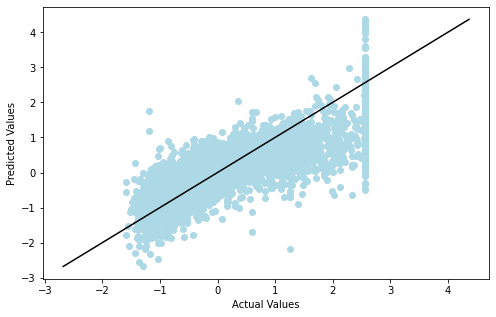

---------------------------------------------------------------

Training Data Evaluation Metrics for :  Ridge Regression
MEA (Mean Absolute Error) : 0.4638424847951795
MSE (Mean Squared Error) : 0.4006956850936152
RMSE (Root Mean Squared Error) : 0.6330052804626635
R2 (R-square Score) : 0.5992765793429367

Test Data Evaluation Metrics for :  Ridge Regression
MEA (Mean Absolute Error) : 0.45450811492155185
MSE (Mean Squared Error) : 0.3783264145097473
RMSE (Root Mean Squared Error) : 0.6150824452947322
R2 (R-square Score) : 0.6216124763940645



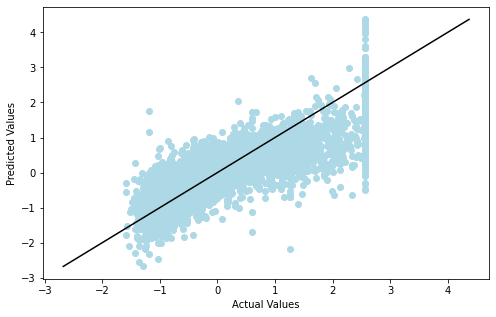

---------------------------------------------------------------

Training Data Evaluation Metrics for :  Lasso Regression
MEA (Mean Absolute Error) : 0.5459264955824026
MSE (Mean Squared Error) : 0.5197241608776775
RMSE (Root Mean Squared Error) : 0.7209189697030295
R2 (R-square Score) : 0.48023986458359946

Test Data Evaluation Metrics for :  Lasso Regression
MEA (Mean Absolute Error) : 0.5365836454106939
MSE (Mean Squared Error) : 0.5009506467195178
RMSE (Root Mean Squared Error) : 0.7077786707153005
R2 (R-square Score) : 0.4989684373304404



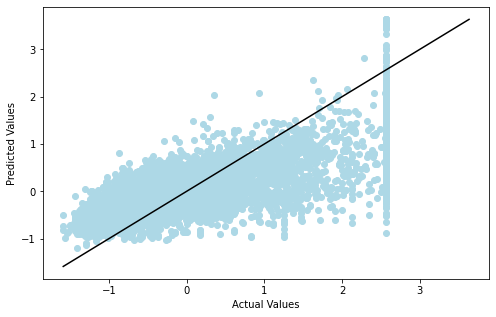

---------------------------------------------------------------

Training Data Evaluation Metrics for :  ElasticNet Regression
MEA (Mean Absolute Error) : 0.7283760768279325
MSE (Mean Squared Error) : 0.8480802543852465
RMSE (Root Mean Squared Error) : 0.9209127289734063
R2 (R-square Score) : 0.15186104275225787

Test Data Evaluation Metrics for :  ElasticNet Regression
MEA (Mean Absolute Error) : 0.7230912870985552
MSE (Mean Squared Error) : 0.8438955759267246
RMSE (Root Mean Squared Error) : 0.918637891623639
R2 (R-square Score) : 0.1559681140141721



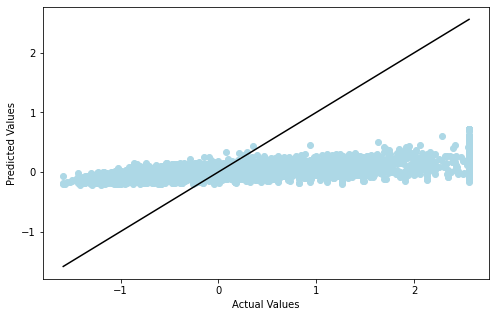

---------------------------------------------------------------

Training Data Evaluation Metrics for :  Bayesian Ridge Regression
MEA (Mean Absolute Error) : 0.4638397892858061
MSE (Mean Squared Error) : 0.4006958756718587
RMSE (Root Mean Squared Error) : 0.6330054309971271
R2 (R-square Score) : 0.5992763887515016

Test Data Evaluation Metrics for :  Bayesian Ridge Regression
MEA (Mean Absolute Error) : 0.4545033307844963
MSE (Mean Squared Error) : 0.37832663614564355
RMSE (Root Mean Squared Error) : 0.6150826254623386
R2 (R-square Score) : 0.6216122547223685



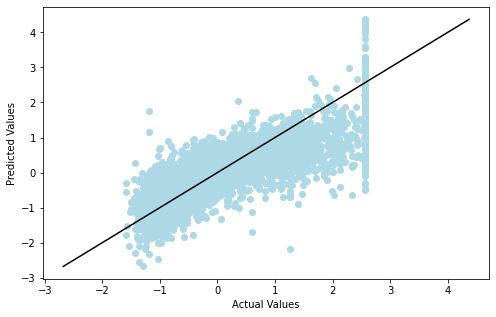

---------------------------------------------------------------

Training Data Evaluation Metrics for :  Decision Tree
MEA (Mean Absolute Error) : 4.111083320698081e-19
MSE (Mean Squared Error) : 1.7808986750424607e-34
RMSE (Root Mean Squared Error) : 1.3345031566251391e-17
R2 (R-square Score) : 1.0

Test Data Evaluation Metrics for :  Decision Tree
MEA (Mean Absolute Error) : 0.4778075972849688
MSE (Mean Squared Error) : 0.5488490546844635
RMSE (Root Mean Squared Error) : 0.7408434751581899
R2 (R-square Score) : 0.45106229258501274



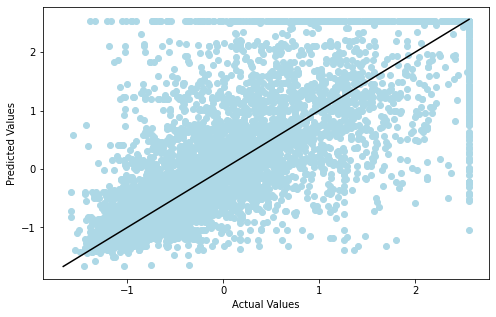

---------------------------------------------------------------

Training Data Evaluation Metrics for :  SVR (Support Vector Regressor)
MEA (Mean Absolute Error) : 0.34013311482889874
MSE (Mean Squared Error) : 0.2568360636344398
RMSE (Root Mean Squared Error) : 0.5067899600765979
R2 (R-square Score) : 0.743146158552612

Test Data Evaluation Metrics for :  SVR (Support Vector Regressor)
MEA (Mean Absolute Error) : 0.3439037115697069
MSE (Mean Squared Error) : 0.2399548211619576
RMSE (Root Mean Squared Error) : 0.4898518359279238
R2 (R-square Score) : 0.7600064201849723



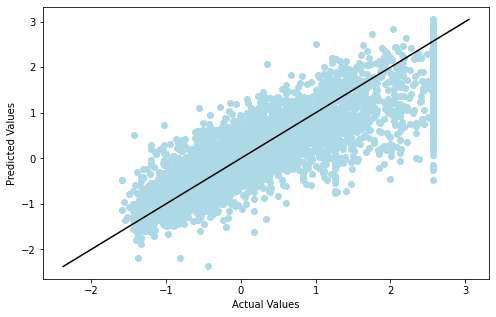

---------------------------------------------------------------

Training Data Evaluation Metrics for :  K Neighbors Regression
MEA (Mean Absolute Error) : 0.2761381519330502
MSE (Mean Squared Error) : 0.16773164627949796
RMSE (Root Mean Squared Error) : 0.40955054178879796
R2 (R-square Score) : 0.8322567435837056

Test Data Evaluation Metrics for :  K Neighbors Regression
MEA (Mean Absolute Error) : 0.39626021861416855
MSE (Mean Squared Error) : 0.3421621631785881
RMSE (Root Mean Squared Error) : 0.5849462908495002
R2 (R-square Score) : 0.657782569148472



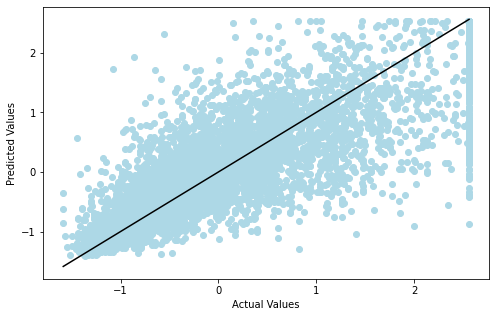

---------------------------------------------------------------

Training Data Evaluation Metrics for :  Random Forest Regression
MEA (Mean Absolute Error) : 0.5607974489194122
MSE (Mean Squared Error) : 0.5425723158392312
RMSE (Root Mean Squared Error) : 0.736595082687382
R2 (R-square Score) : 0.4573901281065087

Test Data Evaluation Metrics for :  Random Forest Regression
MEA (Mean Absolute Error) : 0.5519448751762872
MSE (Mean Squared Error) : 0.5270538249299884
RMSE (Root Mean Squared Error) : 0.7259847277525805
R2 (R-square Score) : 0.47286104280948527



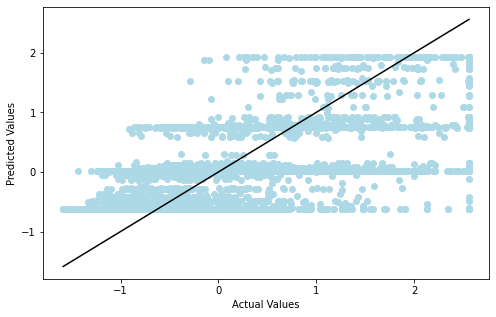

---------------------------------------------------------------

Training Data Evaluation Metrics for :  AdaBoost Regression
MEA (Mean Absolute Error) : 0.7174085186442494
MSE (Mean Squared Error) : 0.6692893051007796
RMSE (Root Mean Squared Error) : 0.8181010359978648
R2 (R-square Score) : 0.33066436768213925

Test Data Evaluation Metrics for :  AdaBoost Regression
MEA (Mean Absolute Error) : 0.7407353705863389
MSE (Mean Squared Error) : 0.7071126175896097
RMSE (Root Mean Squared Error) : 0.8408998855925774
R2 (R-square Score) : 0.29277316619046223



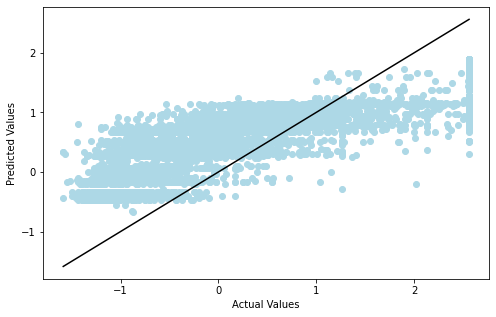

---------------------------------------------------------------

Training Data Evaluation Metrics for :  Gradient Boosting
MEA (Mean Absolute Error) : 0.30911000483610024
MSE (Mean Squared Error) : 0.19604659077476233
RMSE (Root Mean Squared Error) : 0.4427714882134602
R2 (R-square Score) : 0.8039398391698078

Test Data Evaluation Metrics for :  Gradient Boosting
MEA (Mean Absolute Error) : 0.34550288174869803
MSE (Mean Squared Error) : 0.22875042428319625
RMSE (Root Mean Squared Error) : 0.47827860529527794
R2 (R-square Score) : 0.771212626851632



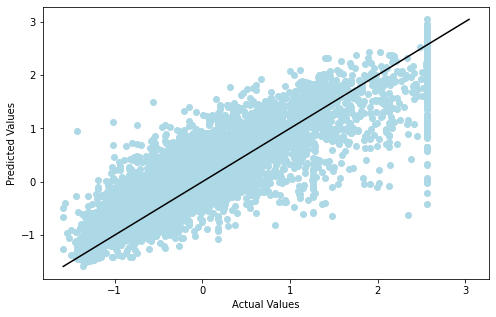

---------------------------------------------------------------

[08:43:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Data Evaluation Metrics for :  XG Boost Regression
MEA (Mean Absolute Error) : 0.04332416567662217
MSE (Mean Squared Error) : 0.0034236867485091366
RMSE (Root Mean Squared Error) : 0.05851227861320337
R2 (R-square Score) : 0.9965760762689513

Test Data Evaluation Metrics for :  XG Boost Regression
MEA (Mean Absolute Error) : 0.31992672664883487
MSE (Mean Squared Error) : 0.21222267716522314
RMSE (Root Mean Squared Error) : 0.460676325813714
R2 (R-square Score) : 0.7877430436105545



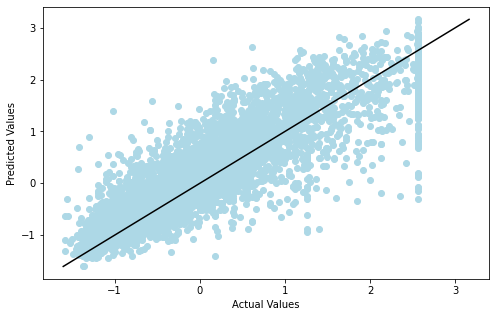

---------------------------------------------------------------



In [257]:
#calling regression function
regression_prototyping(X,y)